In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv


In [4]:
df = pd.read_csv("/kaggle/input/cancer-patients-and-air-pollution-a-new-link/cancer patient data sets.csv")

In [5]:
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [6]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [7]:
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [8]:
df.apply(max)

index                          999
Patient Id                    P999
Age                             73
Gender                           2
Air Pollution                    8
Alcohol use                      8
Dust Allergy                     8
OccuPational Hazards             8
Genetic Risk                     7
chronic Lung Disease             7
Balanced Diet                    7
Obesity                          7
Smoking                          8
Passive Smoker                   8
Chest Pain                       9
Coughing of Blood                9
Fatigue                          9
Weight Loss                      8
Shortness of Breath              9
Wheezing                         8
Swallowing Difficulty            8
Clubbing of Finger Nails         9
Frequent Cold                    7
Dry Cough                        7
Snoring                          7
Level                       Medium
dtype: object

In [9]:
one_hot_df = pd.get_dummies(df['Level'], prefix='level',dtype=int)


In [10]:
one_hot_df

,level_High,level_Low,level_Medium
0,0,1,0
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
995,1,0,0
996,1,0,0
997,1,0,0
998,1,0,0


In [11]:
df = pd.concat([df,one_hot_df], axis=1)


In [12]:
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,level_High,level_Low,level_Medium
0,0,P1,33,1,2,4,5,4,3,2,...,2,3,1,2,3,4,Low,0,1,0
1,1,P10,17,1,3,1,5,3,4,2,...,8,6,2,1,7,2,Medium,0,0,1
2,2,P100,35,1,4,5,6,5,5,4,...,2,1,4,6,7,2,High,1,0,0
3,3,P1000,37,1,7,7,7,7,6,7,...,1,4,5,6,7,5,High,1,0,0
4,4,P101,46,1,6,8,7,7,7,6,...,1,4,2,4,2,3,High,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,7,8,2,4,5,3,High,1,0,0
996,996,P996,37,2,6,8,7,7,7,6,...,7,2,4,3,1,4,High,1,0,0
997,997,P997,25,2,4,5,6,5,5,4,...,2,1,4,6,7,2,High,1,0,0
998,998,P998,18,2,6,8,7,7,7,6,...,1,4,2,4,2,3,High,1,0,0


In [13]:
df = df.drop(['Level','Gender','Patient Id','index'], axis=1)

(array([ 67.,  98., 145., 259., 111., 186.,  63.,  10.,  51.,  10.]),
 array([14. , 19.9, 25.8, 31.7, 37.6, 43.5, 49.4, 55.3, 61.2, 67.1, 73. ]),
 <BarContainer object of 10 artists>)

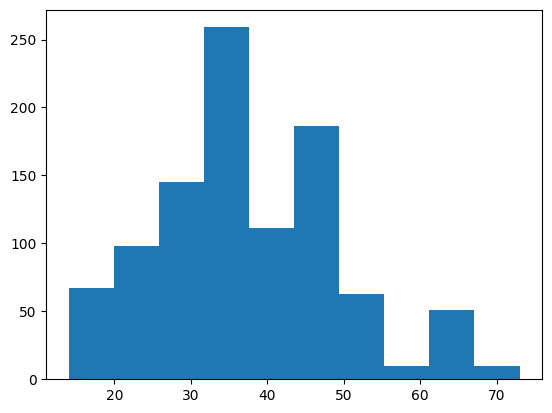

In [14]:
import matplotlib.pyplot as plt


plt.hist(df['Age'])

In [15]:
X = df.drop(['level_High','level_Low','level_Medium'],axis=1)
y = df[['level_High','level_Low','level_Medium']]


In [16]:
X[3:4]

,Age,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
3,37,7,7,7,7,6,7,7,7,7,...,8,4,2,3,1,4,5,6,7,5


In [17]:
y

,level_High,level_Low,level_Medium
0,0,1,0
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
995,1,0,0
996,1,0,0
997,1,0,0
998,1,0,0


In [18]:
df

,Age,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,...,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,level_High,level_Low,level_Medium
0,33,2,4,5,4,3,2,2,4,3,...,2,2,3,1,2,3,4,0,1,0
1,17,3,1,5,3,4,2,2,2,2,...,7,8,6,2,1,7,2,0,0,1
2,35,4,5,6,5,5,4,6,7,2,...,9,2,1,4,6,7,2,1,0,0
3,37,7,7,7,7,6,7,7,7,7,...,3,1,4,5,6,7,5,1,0,0
4,46,6,8,7,7,7,6,7,7,8,...,4,1,4,2,4,2,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,6,7,7,7,7,6,7,7,7,...,2,7,8,2,4,5,3,1,0,0
996,37,6,8,7,7,7,6,7,7,7,...,5,7,2,4,3,1,4,1,0,0
997,25,4,5,6,5,5,4,6,7,2,...,9,2,1,4,6,7,2,1,0,0
998,18,6,8,7,7,7,6,7,7,8,...,4,1,4,2,4,2,3,1,0,0


In [19]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

# Sample data generation
   # Example linear relationship with noise

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2024-02-03 04:36:11.154104: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-03 04:36:11.154197: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-03 04:36:11.290844: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [20]:
input_shape = X.shape[1:]
print(input_shape)

(22,)


In [21]:


# Build a simple neural network model
model = Sequential()
model.add(Dense(units=64, activation='gelu',input_shape=(22,)))
model.add(Dense(units=32, activation='gelu'))
model.add(Dropout(0.2))
model.add(Dense(units=16, activation='gelu'))

model.add(Dense(units=3, activation='softmax'))  # Output layer for regression

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=7, batch_size=4, validation_split=0.25, verbose=1)
model.summary()
# Make predictions on the test set
  


Epoch 1/7
150/150 [==============================] - 1s 3ms/step - loss: 1.1140 - accuracy: 0.4900 - val_loss: 0.6653 - val_accuracy: 0.7950
Epoch 2/7
150/150 [==============================] - 0s 2ms/step - loss: 0.6721 - accuracy: 0.7417 - val_loss: 0.4202 - val_accuracy: 0.8800
Epoch 3/7
150/150 [==============================] - 0s 2ms/step - loss: 0.4912 - accuracy: 0.8350 - val_loss: 0.3404 - val_accuracy: 0.9400
Epoch 4/7
150/150 [==============================] - 0s 2ms/step - loss: 0.3743 - accuracy: 0.8817 - val_loss: 0.2375 - val_accuracy: 0.9650
Epoch 5/7
150/150 [==============================] - 0s 2ms/step - loss: 0.2880 - accuracy: 0.9167 - val_loss: 0.1454 - val_accuracy: 0.9850
Epoch 6/7
150/150 [==============================] - 0s 2ms/step - loss: 0.2217 - accuracy: 0.9317 - val_loss: 0.1067 - val_accuracy: 0.9850
Epoch 7/7
150/150 [==============================] - 0s 2ms/step - loss: 0.1858 - accuracy: 0.9417 - val_loss: 0.0779 - val_accuracy: 0.9850
Model: "seque

In [33]:
df.columns

Index(['Age', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'level_High', 'level_Low',
       'level_Medium'],
      dtype='object')

In [34]:
df_test = df[df['Age']<0]

ip=[24,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5]
ip_df=pd.DataFrame(ip)


In [35]:
df_test =  df_test.drop(['level_High','level_Low','level_Medium'],axis=1)

In [36]:
new_row = tuple(ip)

# Insert the new row using loc
df_test.loc[len(df_test)] = new_row

# Display the DataFrame with the new row
print(df_test)

   Age  Air Pollution  Alcohol use  Dust Allergy  OccuPational Hazards  \
0   24              5            5             5                     5   

   Genetic Risk  chronic Lung Disease  Balanced Diet  Obesity  Smoking  ...  \
0             5                     5              5        5        5  ...   

   Coughing of Blood  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0                  5        5            5                    5         5   

   Swallowing Difficulty  Clubbing of Finger Nails  Frequent Cold  Dry Cough  \
0                      5                         5              5          5   

   Snoring  
0        5  

[1 rows x 22 columns]


In [37]:
df_test

,Age,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,24,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [38]:
model.predict(df_test)

1/1 [==============================] - 0s 15ms/step


array([[0.9751844 , 0.00189716, 0.02291838]], dtype=float32)

In [28]:
X[4:5]

,Age,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
4,46,6,8,7,7,7,6,7,7,8,...,9,3,2,4,1,4,2,4,2,3


In [29]:
df_test

,Age,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,24,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5


In [39]:
model.save('model_cancer_softmax.h5')

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [42]:
import keras
from keras.models import load_model
cnn=load_model('/kaggle/working/model_cancer_softmax.h5')

In [43]:
cnn.predict(df_test)

1/1 [==============================] - 0s 64ms/step


array([[0.9751844 , 0.00189716, 0.02291838]], dtype=float32)

In [46]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0700 - accuracy: 0.9850


[0.06997165083885193, 0.9850000143051147]